# Premiers pas en statistiques

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="sommaire"> </a>
## Sommaire

*  __[Introduction et présentation](#intro)__ <br>

<a id="intro"> </a>

# Introduction et présentation

## Import des packages usuels:

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy.special import comb, binom
from download import download

## Commande "magique" pour un affichage plus avancé en Jupyter:

In [2]:
%matplotlib notebook

## Préparation pour l'affichage graphique et sauvegarder les images:

In [3]:
# saving tools for the course:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

# colors 
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)


dirname = "../prebuiltimages/"
imageformat = ".pdf"

## Grossesses et cigarettes, impact sur la santé du nouveau né

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)

## Téléchargement et import pour sauvegarder les données

In [4]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


## Téléchargement et import des données

In [5]:
url = "http://josephsalmon.eu/enseignement/datasets/babies23.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/babies23.data" # backup url, without header.
path_target = "./babies23.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./babies23.data'

## Option de *pandas* et de pré-traitement:

In [6]:
# Preoprocessing: only run once or big trouble (think about it!)
is_preprocessing_done = 0  # init at 0,if greater don't redo it
pd.options.display.max_rows = 8  # set not to display to many lines in pandas
pd.set_option('precision', 0)  # set to display number at precision 0 in pandas

## Lecture de la base de données et constructions d'un dataframe:

In [7]:
df_babies = pd.read_csv("babies23.data", skiprows=38, sep='\s+') # \s+ : for hanlding spaces
df_babies.head(n=10)  # df stands for Data Frame

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
7,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0
8,142,5,1,1408,289,1,120,3,0,25,...,3,26,1,70,180,0,2,0,0,0
9,148,5,1,1568,299,1,143,3,0,30,...,0,34,5,99,999,1,2,1,1,4


# Pré-traitement:
Lire l'entête du fichier pour comprendre tout ça... les unités, les données manquantes etc.

In [8]:
if is_preprocessing_done<1:
    print("You have to do the pre-processing only once, to avoid unit issues")
    # Remark: use inplace option to avoid useless copies for nans
    df_babies['smoke'].replace(9, np.nan, inplace=True)  # handle missing values
    df_babies['smoke'].replace(0, False, inplace=True)
    df_babies['smoke'].replace(1, True, inplace=True)
    df_babies['smoke'].replace(2, True, inplace=True)
    df_babies['smoke'].replace(3, True, inplace=True)

    df_babies.dropna(inplace=True)
    print("This is done only because {} < 1".format(is_preprocessing_done))
    is_preprocessing_done +=1

You have to do the pre-processing only once, to avoid unit issues
This is done only because 0 < 1


# Analyse du sexe de l'enfant

In [9]:
df_babies.head(20)

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,False,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,False,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,True,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,True,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,207,5,1,1481,255,1,92,3,4,25,...,7,28,1,99,999,1,1,True,1,5
17,217,5,1,1605,261,1,115,3,3,33,...,3,33,2,70,140,1,4,True,1,5
18,239,5,1,1431,261,1,144,2,0,33,...,5,35,4,99,999,1,7,False,0,0
19,240,5,1,1647,288,1,119,3,0,43,...,0,45,2,73,195,1,5,True,1,6


<IPython.core.display.Javascript object>


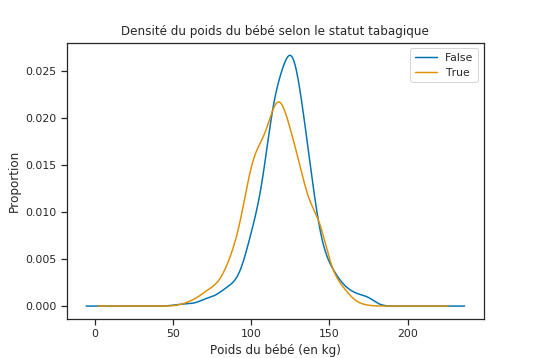

Text(0.5,1,'Densité du poids du bébé selon le statut tabagique')

In [10]:
plt.figure(figsize=(6,4))
df_babies.groupby("smoke").wt.plot(kind='kde')
plt.legend()
plt.xlabel('Poids du bébé (en kg)')
plt.ylabel('Proportion')
plt.title("Densité du poids du bébé selon le statut tabagique")

In [11]:
smoke_by_type = df_babies.smoke.value_counts()
n_total = df_babies.smoke.count()
print("Il y a {} bébés dont on connait le statut tabagique de la mère".format(n_total))

Il y a 1226 bébés dont on connait le statut tabagique de la mère


In [12]:
smoke_by_type

True     682
False    544
Name: smoke, dtype: int64

In [13]:
smoke_ratio= smoke_by_type[True] / df_babies.smoke.count()

In [14]:
print("La proportion de mères fumeuses est de {0:.2f} % dans la popultation totale.".format(smoke_ratio * 100))

La proportion de mères fumeuses est de 55.63 % dans la popultation totale.


## Tirage aléatoire de n_samples échantillons (parmi les 1226)

In [20]:
n_samples = 91

# change the random_state value to get another random sample
# df_extract = df_babies.sample(n=n_samples, random_state=45)
df_extract = df_babies.sample(n=n_samples)
smoke_by_type_extract = df_extract.smoke.value_counts()
smoke_ratio_extract = smoke_by_type_extract[True] / df_extract.smoke.count()
print("La proportion de mères fumeuses est de {0:.2f} % dans la popultation extraite.".format(smoke_ratio_extract * 100))

La proportion de mères fumeuses est de 51.65 % dans la popultation extraite.


In [21]:
comb(n_total, n_samples, exact=True)

27163361289825550523268206145916032768087536721887922928079532500193847739178087753157271974542740511341704937942015497847278125901041363840

In [22]:
n_digits = sys.getsizeof(comb(n_total, n_samples, exact=True))

In [23]:
print(r"Il y a environ 10^{2} façon de choisir {0} nombres parmi {1}".format(n_samples, n_total, n_digits))

Il y a environ 10^88 façon de choisir 91 nombres parmi 1226


In [19]:
##